# Support Vector Machine Classifiers & Experimentation
## Wisconsin Breast Cancer Diagnosis Prediction
## Importing Packages 

In [189]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
from matplotlib.pylab import rcParams
%matplotlib inline
from sklearn import svm
from sklearn import preprocessing

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



In [190]:
diagnosis = pd.read_csv("wisconsin_breast_cancer_diagnosis.csv")

In [191]:
diagnosis= diagnosis[pd.notnull(diagnosis['diagnosis'])]

In [192]:
diagnosis.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [193]:
diagnosis.iloc[:,2:32].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [194]:
from sklearn.svm import SVC

X = diagnosis.iloc[:,2:32]  
y = diagnosis.iloc[:,1]
y.replace(['B', 'M'], [0, 1], inplace=True)


In [195]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



In [196]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [197]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=111).fit(X_train, y_train)

In [198]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[106,   2],
       [  2,  61]])

In [199]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9766081871345029

In [200]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test =   cross_validation.train_test_split(X,   y, test_size=0.30, random_state=111)


In [201]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [221]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=111).fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[101,   2],
       [  3,  65]])

In [222]:
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))


Train accuracy = 98.49%
Test accuracy = 97.08%

 Confusion Matrix: 

[[101   2]
 [  3  65]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       103
          1       0.97      0.96      0.96        68

avg / total       0.97      0.97      0.97       171



## Tuning the C- value (Penalty parameter)

In [238]:
accuracy_test=[None]*100
accuracy_train=[None]*100
c = [None]*100
count=0
c[0] = 1
for i in range(100):
    clf = svm.SVC(C= c[i], random_state=111, kernel='linear',class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr').fit(X_train, y_train)
    accuracy_train[i] = np.round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test[i] = np.round(clf.score(X_test, y_test) * 100, 2)
    if i < 99:
        c[i+1] = c[i] + 0.2

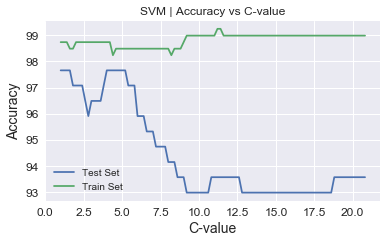

In [245]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(c,accuracy_test)
ax1.plot(c,accuracy_train)


plt.title("SVM | Accuracy vs C-value")
plt.xlabel("C-value")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

### C = 1.2 looks like optimum value 

In [243]:
start = time.time()

clf = svm.SVC(C=1.2, random_state=111,kernel='linear', class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr')
clf.fit(X_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
timeTaken[0] =(end - start)
timeTaken[0]

SVC(C=1.2, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=111, shrinking=True,
  tol=0.001, verbose=False)

Train accuracy = 98.74%
Test accuracy = 97.66%

 Confusion Matrix: 

[[101   2]
 [  2  66]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       103
          1       0.97      0.97      0.97        68

avg / total       0.98      0.98      0.98       171



0.015572547912597656

## Using Kernel function RBF

In [286]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='rbf', random_state=111,class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr').fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 97.99%
Test accuracy = 98.25%

 Confusion Matrix: 

[[101   2]
 [  1  67]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       103
          1       0.97      0.99      0.98        68

avg / total       0.98      0.98      0.98       171



In [287]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.9824561403508771

In [289]:
accuracy_test=[None]*100
accuracy_train=[None]*100
c = [None]*100
count=0
c[0] = 1
for i in range(100):
    clf = svm.SVC(C= c[i], random_state=111, kernel='rbf',class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr').fit(X_train, y_train)
    accuracy_train[i] = np.round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test[i] = np.round(clf.score(X_test, y_test) * 100, 2)
    if i < 99:
        c[i+1] = c[i] + 0.2

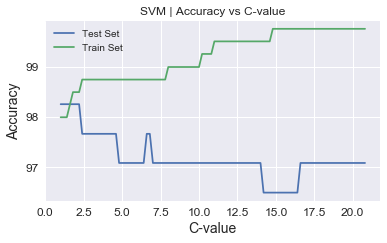

In [290]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(c,accuracy_test)
ax1.plot(c,accuracy_train)


plt.title("SVM | Accuracy vs C-value")
plt.xlabel("C-value")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

### c = 2.3 is the optimum penalty parameter

In [291]:
start = time.time()

clf = svm.SVC(C=2.3, random_state=111,kernel='rbf', class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr')
clf.fit(X_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
timeTaken[0] =(end - start)
timeTaken[0]

SVC(C=2.3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=111, shrinking=True,
  tol=0.001, verbose=False)

Train accuracy = 98.74%
Test accuracy = 98.25%

 Confusion Matrix: 

[[101   2]
 [  1  67]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       103
          1       0.97      0.99      0.98        68

avg / total       0.98      0.98      0.98       171



0.031206369400024414

In [292]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='poly', random_state=111,class_weight = 'balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))


Train accuracy = 93.22%
Test accuracy = 92.98%

 Confusion Matrix: 

[[103   0]
 [ 12  56]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.90      1.00      0.94       103
          1       1.00      0.82      0.90        68

avg / total       0.94      0.93      0.93       171



In [304]:
accuracy_test=[None]*100
accuracy_train=[None]*100
c = [None]*100
count=0
c[0] = 1
for i in range(100):
    clf = svm.SVC(C= c[i], random_state=111, kernel='poly',degree = 3,class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr').fit(X_train, y_train)
    accuracy_train[i] = np.round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test[i] = np.round(clf.score(X_test, y_test) * 100, 2)
    if i < 99:
        c[i+1] = c[i] + 0.2

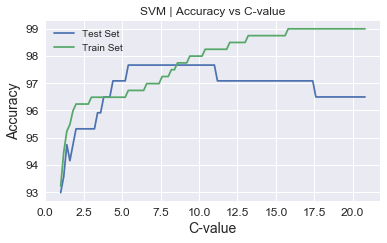

In [305]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(c,accuracy_test)
ax1.plot(c,accuracy_train)


plt.title("SVM | Accuracy vs C-value")
plt.xlabel("C-value")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

In [312]:
start = time.time()

clf = svm.SVC(C=11, random_state=111,kernel='poly', class_weight='balanced',degree =3, verbose=False, max_iter=-1, decision_function_shape='ovr')
clf.fit(X_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
timeTaken[0] =(end - start)
timeTaken[0]

SVC(C=11, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=111, shrinking=True,
  tol=0.001, verbose=False)

Train accuracy = 98.24%
Test accuracy = 97.66%

 Confusion Matrix: 

[[102   1]
 [  3  65]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       103
          1       0.98      0.96      0.97        68

avg / total       0.98      0.98      0.98       171



0.03597688674926758

# Student Math Grade prediction using SVM

In [313]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import scipy.optimize as opt 
import random 
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [314]:

data = pd.read_csv("student-mat.csv",sep = ";")
median = data['G3'].median()
data['G3'] = np.where(data['G3']>=median, 1, 0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0


## Make Dummy variables

In [316]:
data = data.drop(["G1","G2"], axis=1)
data = pd.get_dummies(data,drop_first = True)
train, test = train_test_split(data, test_size=0.3,random_state=23)
X_train=train.drop(['G3'], axis = 1)
y_train=train['G3']
X_test=test.drop(['G3'],axis = 1)
y_test=test['G3']
X_train, y_train, X_test, y_test

(     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
 84    15     1     1           1          2         0       4         3   
 64    15     4     3           1          2         0       4         4   
 16    16     4     4           1          3         0       3         2   
 77    16     2     2           1          4         0       5         2   
 190   16     2     3           1          2         0       4         3   
 10    15     4     4           1          2         0       3         3   
 34    16     3     2           1          1         0       5         4   
 13    15     4     3           2          2         0       5         4   
 176   16     2     2           2          2         0       3         4   
 28    16     3     4           1          2         0       5         3   
 270   19     3     3           1          2         2       4         3   
 394   19     1     1           1          1         0       3         2   
 314   19   

## Normalized

In [317]:
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

## Linear SVM

In [340]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=111,class_weight='balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))


Train accuracy = 79.71%
Test accuracy = 59.66%

 Confusion Matrix: 

[[25 22]
 [26 46]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.49      0.53      0.51        47
          1       0.68      0.64      0.66        72

avg / total       0.60      0.60      0.60       119



### Tuning penalty parameter C

In [344]:
accuracy_test=[None]*10
accuracy_train=[None]*10
c = [None]*10
count=0
c[0] = 1
for i in range(10):
    clf = svm.SVC(C= c[i], random_state=111, kernel='linear',class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr').fit(X_train, y_train)
    accuracy_train[i] = np.round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test[i] = np.round(clf.score(X_test, y_test) * 100, 2)
    if i < 9:
        c[i+1] = c[i] + 0.5

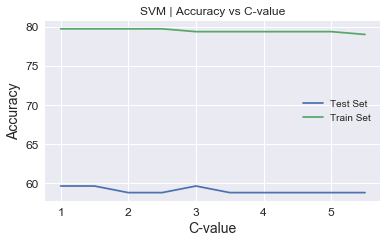

In [345]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(c,accuracy_test)
ax1.plot(c,accuracy_train)


plt.title("SVM | Accuracy vs C-value")
plt.xlabel("C-value")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

### optimum penalty parameter value c = 1.40

In [346]:
start = time.time()

clf = svm.SVC(C=1.40, random_state=111,kernel='linear', class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr')
clf.fit(X_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
timeTaken[0] =(end - start)
timeTaken[0]

SVC(C=1.4, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=111, shrinking=True,
  tol=0.001, verbose=False)

Train accuracy = 80.07%
Test accuracy = 59.66%

 Confusion Matrix: 

[[25 22]
 [26 46]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.49      0.53      0.51        47
          1       0.68      0.64      0.66        72

avg / total       0.60      0.60      0.60       119



0.04684853553771973

## RBF SVM

In [411]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='rbf', random_state=111, class_weight = 'balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))


Train accuracy = 94.2%
Test accuracy = 58.82%

 Confusion Matrix: 

[[25 22]
 [27 45]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.48      0.53      0.51        47
          1       0.67      0.62      0.65        72

avg / total       0.60      0.59      0.59       119



### Tuning C value using RBF kernel

In [412]:
accuracy_test=[None]*20
accuracy_train=[None]*20
c = [None]*20
count=0
c[0] = 1
for i in range(20):
    clf = svm.SVC(C= c[i], random_state=111, kernel='rbf',class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr').fit(X_train, y_train)
    accuracy_train[i] = np.round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test[i] = np.round(clf.score(X_test, y_test) * 100, 2)
    if i < 19:
        c[i+1] = c[i] + 0.4

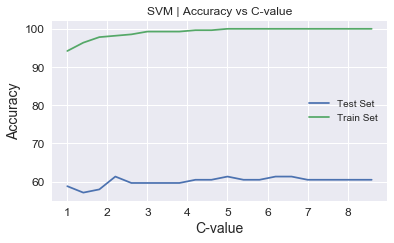

In [413]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(c,accuracy_test)
ax1.plot(c,accuracy_train)


plt.title("SVM | Accuracy vs C-value")
plt.xlabel("C-value")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

### setting the c value to 6.2 which appears to be the optimum value

In [416]:
start = time.time()

clf = svm.SVC(C=6.2, random_state=111,kernel='rbf',class_weight = 'balanced', verbose=False, max_iter=-1, decision_function_shape='ovr')
clf.fit(X_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
timeTaken[0] =(end - start)
timeTaken[0]

SVC(C=6.2, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=111, shrinking=True,
  tol=0.001, verbose=False)

Train accuracy = 100.0%
Test accuracy = 61.34%

 Confusion Matrix: 

[[25 22]
 [24 48]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.51      0.53      0.52        47
          1       0.69      0.67      0.68        72

avg / total       0.62      0.61      0.61       119



0.03124547004699707

## Poly SVM 
** I have set the parameter degree = 2 which is the best one as per the experimentation carried by by me manually **

In [398]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='poly', random_state=0, class_weight = 'balanced', degree=2).fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))


Train accuracy = 94.2%
Test accuracy = 62.18%

 Confusion Matrix: 

[[18 29]
 [16 56]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.53      0.38      0.44        47
          1       0.66      0.78      0.71        72

avg / total       0.61      0.62      0.61       119



## Plotting the Accuracy wrt penalty parameter C

In [407]:
accuracy_test=[None]*50
accuracy_train=[None]*50
c = [None]*50
count=0
c[0] = 1
for i in range(50):
    clf = svm.SVC(C= c[i], random_state=111, kernel='poly',degree=2, verbose=False, max_iter=-1, decision_function_shape='ovr').fit(X_train, y_train)
    accuracy_train[i] = np.round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test[i] = np.round(clf.score(X_test, y_test) * 100, 2)
    if i < 49:
        c[i+1] = c[i] + 0.5

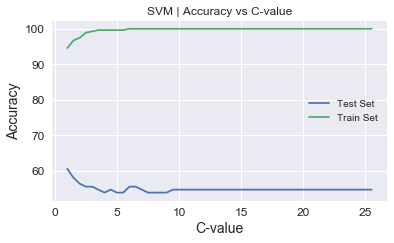

In [408]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(c,accuracy_test)
ax1.plot(c,accuracy_train)


plt.title("SVM | Accuracy vs C-value")
plt.xlabel("C-value")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

### the default value c = 1 seems to be the appropriate in case of poly kernel function of degree = 2